In [ ]:
import pandas as pd
import numpy as np
import warnings
import math
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df = pd.read_csv('/content/Admission_Predict.csv')
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
X = df[['GRE Score','TOEFL Score','University Rating','SOP','LOR ','CGPA','Research']]
Y = df['Chance of Admit ']

In [ ]:
# Standardize X & Y
Y = np.array((Y - Y.mean())/Y.std())
X = X.apply(lambda rec: (rec - rec.mean())/rec.std(),axis = 0)

In [ ]:
import random
def initialize(dim):
  np.random.seed(seed=48)
  b = random.random()
  theta=np.random.rand(dim)
  return b ,theta

In [ ]:
b,theta = initialize(7)
print("Bias: ",b,"Weights: ",theta)

Bias:  0.4001282983870289 Weights:  [0.01749027 0.89157327 0.28486117 0.29897638 0.79203426 0.3244706
 0.86471039]


In [ ]:
def predict_Y(b,theta,X):
  return b + np.dot(X,theta)

In [ ]:
b,theta=initialize(7)
Y_hat=predict_Y(b,theta,X)

In [ ]:
Y_hat[0:10]

array([ 4.6456371 ,  2.43710417,  0.0833101 ,  0.60532094, -2.67423649,
        2.9523766 ,  1.37498996, -1.96738261, -4.52504653, -1.01937116])

In [ ]:
Y.shape

(400,)

In [ ]:
def get_cost(Y,Y_hat):
  Y_resd=Y-Y_hat      # Calculating the residuals from taking difference between actual and predicted values
  return np.sum(np.dot(Y_resd.T,Y_resd))/(2*len(Y-Y_resd))

In [ ]:
b,theta=initialize(7)
Y_hat=predict_Y(b,theta,X)
get_cost(Y,Y_hat)

2.057987233990243

In [ ]:
def update_theta(x,y,y_hat,b_0,theta_o,learning_rate):
  #gradient of bias
  db=(np.sum(y_hat-y))/len(y)
  #gradient of weights
  dw=(np.sum(np.dot((y_hat-y),x)))/len(y)
    #update bias
  b_1=b_0-learning_rate*db
#update theta
  theta_1=theta_o-learning_rate*dw
    #return the new bias and beta values
  return b_1,theta_1

In [ ]:
b,theta=initialize(7)
print("After initialization Bias: ",b,"theta: ",theta)
Y_hat=predict_Y(b,theta,X)
b,theta=update_theta(X,Y,Y_hat,b,theta,0.001)
print("After first update -Bias: ",b,"theta: ",theta)

After initialization Bias:  0.06360994835112566 theta:  [0.01749027 0.89157327 0.28486117 0.29897638 0.79203426 0.3244706
 0.86471039]
After first update -Bias:  0.06354633840277453 theta:  [0.006396   0.880479   0.2737669  0.28788211 0.78093999 0.31337633
 0.85361612]


In [ ]:
def run_gradient_descent(X,
                         Y,
                         alpha=0.001,
                         num_iterations=500):
# Intialize the bias and weights
  b,theta=initialize(X.shape[1])
  iter_num=0
  # gd_iterations_df keeps track of the cost every 10 iterations
  gd_iterations_df=pd.DataFrame(columns=['iteration','cost'])
  result_idx=0
    
    # Run the iterations in loop

  for each_iter in range(num_iterations):
    Y_hat=predict_Y(b,theta,X)          # Calcuated predicted value of y
    this_cost=get_cost(Y,Y_hat)         # Calculate the cost
    prev_b=b                            # Save the previous bias and weights
    prev_theta=theta
    b,theta=update_theta(X,Y,Y_hat,prev_b,prev_theta,alpha)       # Update and calculate the new values of bias and weights

    if(iter_num%10==0):                                       # For every 10 iterations, store the cost i.e. MSE
      gd_iterations_df.loc[result_idx]=[iter_num,this_cost]
      result_idx=result_idx+1
    iter_num +=1
  print("Final Estimate of b and theta : ",b,theta)
#return the final bias, weights and the cost at the end

  return gd_iterations_df,b,theta

In [ ]:
gd_iterations_df,b,theta=run_gradient_descent(X,Y,alpha=0.001,num_iterations=500)

Final Estimate of b and theta :  0.03740014332369897 [-0.31160884  0.56247416 -0.04423794 -0.03012273  0.46293515 -0.00462851
  0.53561128]


In [ ]:
gd_iterations_df[0:20]

,iteration,cost
0,0.0,2.052551
1,10.0,1.146423
2,20.0,0.690021
3,30.0,0.460131
4,40.0,0.344326
5,50.0,0.285982
6,60.0,0.256580
7,70.0,0.241755
8,80.0,0.234273
9,90.0,0.230488


Text(0, 0.5, 'Cost or MSE')

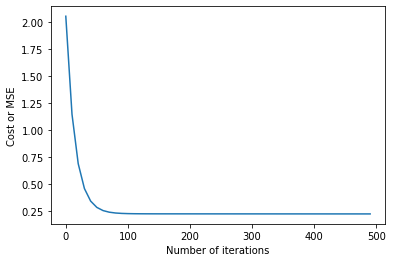

In [ ]:
plt.plot(gd_iterations_df['iteration'],gd_iterations_df['cost'])
plt.xlabel("Number of iterations")
plt.ylabel("Cost or MSE")

In [ ]:
alpha_df_1,b,theta=run_gradient_descent(X,Y,alpha=0.01,num_iterations=500)
alpha_df_1[0:20]

Final Estimate of b and theta :  0.0013789668263614323 [-0.31160885  0.56247415 -0.04423795 -0.03012274  0.46293514 -0.00462852
  0.53561127]


,iteration,cost
0,0.0,2.072672
1,10.0,0.243595
2,20.0,0.239825
3,30.0,0.237142
4,40.0,0.234948
5,50.0,0.233153
6,60.0,0.231685
7,70.0,0.230485
8,80.0,0.229503
9,90.0,0.228700


Text(0, 0.5, 'Cost or MSE')

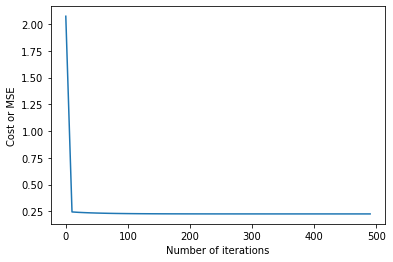

In [ ]:
plt.plot(alpha_df_1['iteration'],alpha_df_1['cost'])
plt.xlabel("Number of iterations")
plt.ylabel("Cost or MSE")

In [ ]:
alpha_df_2,b,theta=run_gradient_descent(X,Y,alpha=0.1,num_iterations=500)
alpha_df_2[0:20]

Final Estimate of b and theta :  1.0856541242800456e+171 [9.8270097e+186 9.8270097e+186 9.8270097e+186 9.8270097e+186
 9.8270097e+186 9.8270097e+186 9.8270097e+186]


,iteration,cost
0,0.0,2.382701e+00
1,10.0,5.759690e+07
2,20.0,1.817201e+15
3,30.0,5.733326e+22
4,40.0,1.808883e+30
5,50.0,5.707084e+37
6,60.0,1.800603e+45
7,70.0,5.680961e+52
8,80.0,1.792361e+60
9,90.0,5.654958e+67


Text(0, 0.5, 'Cost or MSE')

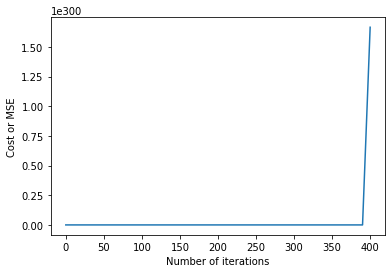

In [ ]:
plt.plot(alpha_df_2['iteration'],alpha_df_2['cost'])
plt.xlabel("Number of iterations")
plt.ylabel("Cost or MSE")

Text(0.5, 1.0, 'Cost Vs. Iterations for different alpha values')

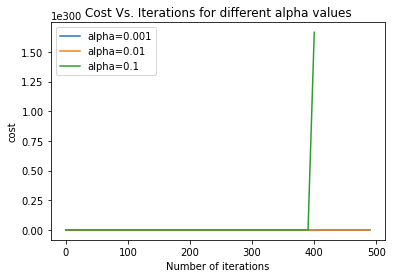

In [ ]:
plt.plot(gd_iterations_df['iteration'],gd_iterations_df['cost'],label="alpha=0.001")
plt.plot(alpha_df_1['iteration'],alpha_df_1['cost'],label="alpha=0.01")
plt.plot(alpha_df_2['iteration'],alpha_df_2['cost'],label="alpha=0.1")
plt.legend()
plt.ylabel('cost')
plt.xlabel('Number of iterations')
plt.title('Cost Vs. Iterations for different alpha values')

Final Estimate of b and theta :  0.10912576002601938 [-0.31160885  0.56247415 -0.04423795 -0.03012274  0.46293514 -0.00462852
  0.53561127]
    iteration      cost
0         0.0  2.376389
1        10.0  1.463845
2        20.0  1.001155
3        30.0  0.765101
4        40.0  0.643254
5        50.0  0.578989
6        60.0  0.543782
7        70.0  0.523267
8        80.0  0.510207
9        90.0  0.500956
10      100.0  0.493677
11      110.0  0.487442
12      120.0  0.481784
13      130.0  0.476467
14      140.0  0.471370
15      150.0  0.466432
16      160.0  0.461621
17      170.0  0.456921
18      180.0  0.452320
19      190.0  0.447815
-----------------------------------------------------------
Final Estimate of b and theta :  1.033478116804195e-09 [-0.31160885  0.56247415 -0.04423795 -0.03012274  0.46293514 -0.00462852
  0.53561127]
    iteration      cost
0         0.0  2.204390
1        10.0  0.351328
2        20.0  0.327941
3        30.0  0.309213
4        40.0  0.293895
5        5

Text(0, 0.5, 'Cost or MSE')

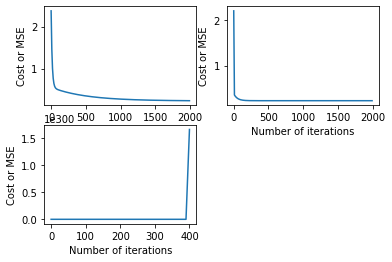

In [ ]:
alpha_df_3,b,theta=run_gradient_descent(X,Y,alpha=0.001,num_iterations=2000)
print(alpha_df_3[0:20])
plt.subplot(2,2,1)
plt.plot(alpha_df_3['iteration'],alpha_df_3['cost'])
plt.xlabel("Number of iterations")
plt.ylabel("Cost or MSE")

print("-----------------------------------------------------------")

alpha_df_4,b,theta=run_gradient_descent(X,Y,alpha=0.01,num_iterations=2000)
print(alpha_df_4[0:20])
plt.subplot(2,2,2)
plt.plot(alpha_df_4['iteration'],alpha_df_4['cost'])
plt.xlabel("Number of iterations")
plt.ylabel("Cost or MSE")

print("-----------------------------------------------------------")

alpha_df_5,b,theta=run_gradient_descent(X,Y,alpha=0.1,num_iterations=2000)
print(alpha_df_5[0:20])
plt.subplot(2,2,3)
plt.plot(alpha_df_5['iteration'],alpha_df_5['cost'])
plt.xlabel("Number of iterations")
plt.ylabel("Cost or MSE")


In [ ]:
alpha_df_5,b,theta=run_gradient_descent(X,Y,alpha=0.1,num_iterations=2000)

Final Estimate of b and theta :  nan [nan nan nan nan nan nan nan]


Text(0.5, 1.0, 'Cost Vs. Iterations for different alpha values')

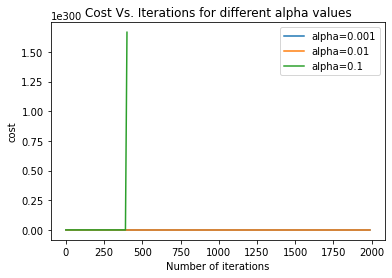

In [ ]:
plt.plot(alpha_df_3['iteration'],alpha_df_3['cost'],label="alpha=0.001")
plt.plot(alpha_df_4['iteration'],alpha_df_4['cost'],label="alpha=0.01")
plt.plot(alpha_df_5['iteration'],alpha_df_5['cost'],label="alpha=0.1")
plt.legend()
plt.ylabel('cost')
plt.xlabel('Number of iterations')
plt.title('Cost Vs. Iterations for different alpha values')

For alpha=0.1 and no.of iterations = 2000 it is overshooting , therefore the values displayed are nan

Final Estimate of b and theta :  0.003751926545891052 [-0.31160885  0.56247415 -0.04423795 -0.03012274  0.46293514 -0.00462852
  0.53561127]
    iteration      cost
0         0.0  2.206459
1        10.0  1.297282
2        20.0  0.837892
3        30.0  0.605072
4        40.0  0.486396
5        50.0  0.425237
6        60.0  0.393077
7        70.0  0.375547
8        80.0  0.365414
9        90.0  0.359032
10      100.0  0.354564
11      110.0  0.351085
12      120.0  0.348128
13      130.0  0.345459
14      140.0  0.342958
15      150.0  0.340564
16      160.0  0.338247
17      170.0  0.335990
18      180.0  0.333786
19      190.0  0.331628
-----------------------------------------------------------
Final Estimate of b and theta :  2.4701611956036857e-15 [-0.31160885  0.56247415 -0.04423795 -0.03012274  0.46293514 -0.00462852
  0.53561127]
    iteration      cost
0         0.0  2.172165
1        10.0  0.324971
2        20.0  0.306383
3        30.0  0.291581
4        40.0  0.279473
5       

Text(0, 0.5, 'Cost or MSE')

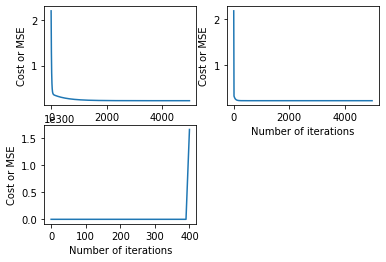

In [ ]:
alpha_df_6,b,theta=run_gradient_descent(X,Y,alpha=0.001,num_iterations=5000)
print(alpha_df_6[0:20])
plt.subplot(2,2,1)
plt.plot(alpha_df_6['iteration'],alpha_df_6['cost'])
plt.xlabel("Number of iterations")
plt.ylabel("Cost or MSE")

print("-----------------------------------------------------------")

alpha_df_7,b,theta=run_gradient_descent(X,Y,alpha=0.01,num_iterations=5000)
print(alpha_df_7[0:20])
plt.subplot(2,2,2)
plt.plot(alpha_df_7['iteration'],alpha_df_7['cost'])
plt.xlabel("Number of iterations")
plt.ylabel("Cost or MSE")

print("-----------------------------------------------------------")

alpha_df_8,b,theta=run_gradient_descent(X,Y,alpha=0.1,num_iterations=5000)
print(alpha_df_8[0:20])
plt.subplot(2,2,3)
plt.plot(alpha_df_8['iteration'],alpha_df_8['cost'])
plt.xlabel("Number of iterations")
plt.ylabel("Cost or MSE")

In [ ]:
alpha_df_8,b,theta=run_gradient_descent(X,Y,alpha=0.1,num_iterations=5000)


Final Estimate of b and theta :  nan [nan nan nan nan nan nan nan]


Text(0.5, 1.0, 'Cost Vs. Iterations for different alpha values')

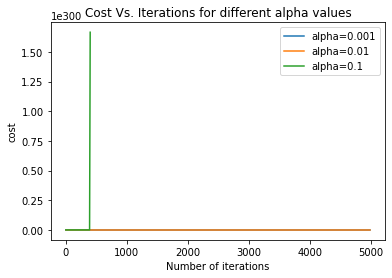

In [ ]:

plt.plot(alpha_df_6['iteration'],alpha_df_6['cost'],label="alpha=0.001")
plt.plot(alpha_df_7['iteration'],alpha_df_7['cost'],label="alpha=0.01")
plt.plot(alpha_df_8['iteration'],alpha_df_8['cost'],label="alpha=0.1")
plt.legend()
plt.ylabel('cost')
plt.xlabel('Number of iterations')
plt.title('Cost Vs. Iterations for different alpha values')

For alpha=0.1 and no.of iterations = 5000 it is overshooting , therefore the values displayed are nan

**Conclusion:**

For learning rate = 0.1 as the learning rate increases equal to or greater than 2000 the optimal pt is overshooting. 

As the learning rate increases, we see a decrease in the cost function.
